In [2]:
import re                                  # for text preprocessing
import pandas as pd                        # for data manipulation and analysis
#import json                                # to load  jason file
import  numpy as np                        # to deal with mul
import matplotlib.pyplot as plt            # for visualization
import seaborn as sns
sns.set()
#from tabulate import tabulate              # to create tabels 
from ipywidgets import interact            # to make intractive functions 
pd.set_option('display.max_columns',30)    # to limit the number of rows displayed
from datetime import datetime              # for preprocessing the data for time-series analysis
import warnings 
warnings.filterwarnings('ignore')
#import mysql.connector as sql
from google.colab import drive # to access the drive files 
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks
from sklearn.cluster import KMeans
from yellowbrick.cluster import silhouette_visualizer
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import sys
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pickle
import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


In [3]:
data_df=pd.read_csv('Clean_data.csv')


# **Clustring**

In [4]:
data1=pd.get_dummies(data_df['verified'])
data_df=pd.concat([data_df,data1],axis=1)
data=pd.get_dummies(data_df['Sentiments'])
data_df=pd.concat([data_df,data],axis=1)
data_df['Negative']=data_df['Negative'].replace(0,np.nan,regex=True)
data_df['Neutral']=data_df['Neutral'].replace(0,np.nan,regex=True)
data_df['Positive']=data_df['Positive'].replace(0,np.nan,regex=True)
data_df[0]=data_df[0].replace(0,np.nan,regex=True)
data_df[1]=data_df[1].replace(0,np.nan,regex=True)

In [5]:
import statistics as st
mode = lambda x: st.mode(x)
cl=data_df.groupby(['asin']).agg(
Total_Sold=(1,'count'),
Negative=('Negative','count'),
Neutral=('Neutral','count'),
Positive=('Positive','count'),
Price=('price','mean'),
Sales=('price','sum'),
Rank=('rank','median'),
Verified_True=(1,'count'),
Verified_False=(0,'count'),
Rating=('overall',mode)
).reset_index()
display(cl.head(2))

,asin,Total_Sold,Negative,Neutral,Positive,Price,Sales,Rank,Verified_True,Verified_False,Rating
0,B0000223SI,12,0,0,13,15.99,207.87,19857.0,12,1,5
1,B0000223SK,20,0,1,21,17.99,395.78,13586.0,20,2,5


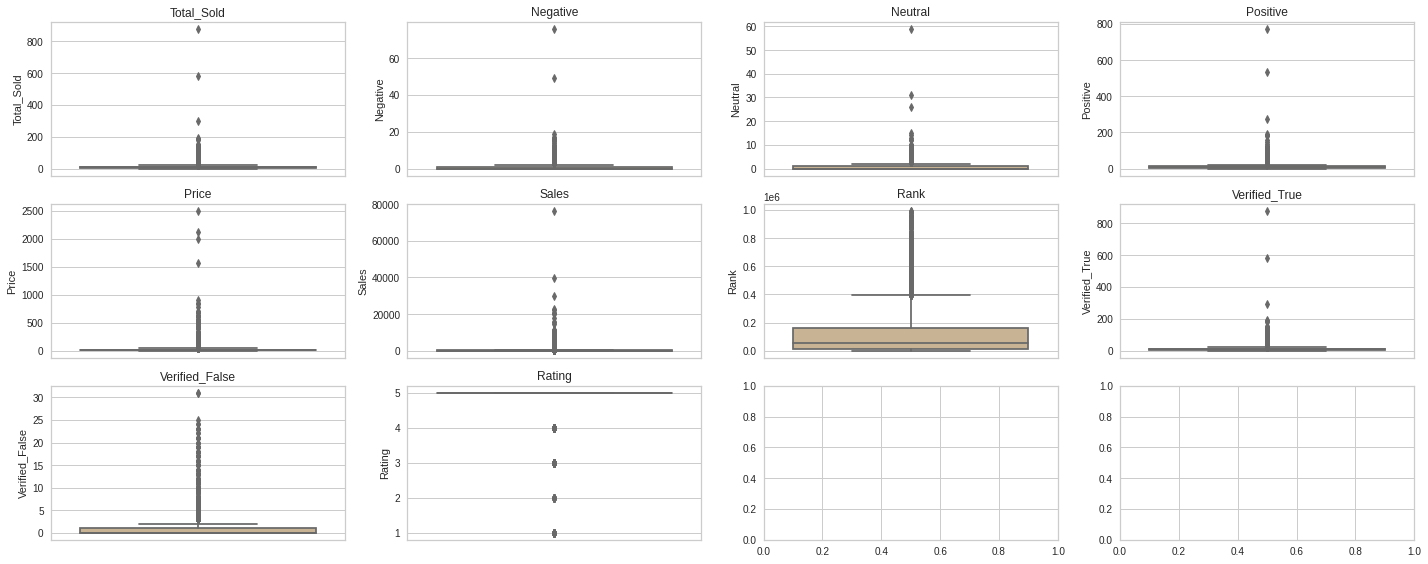

In [6]:
numerics=['int16','int32','int64','float16','float32','float64'] #list of all numeric type in daataframe
con_df=cl.select_dtypes(include=numerics)# create dataframe for all numeric type
con_cols=con_df.columns # taking colums 
num_cols=4  # how many column we want in subplot 
n_bins=20 # bin size for histogram 
num_rows=int(len(con_cols)/num_cols)+1   #rows for subplot

figs,axes =plt.subplots(num_rows,num_cols,tight_layout=True,figsize=(20,8))

for col ,ax in zip(con_cols,axes.flatten()):
    sns.boxplot(y=con_df[col],ax=ax,color='tan')
    ax.set_title(col)
plt.show()

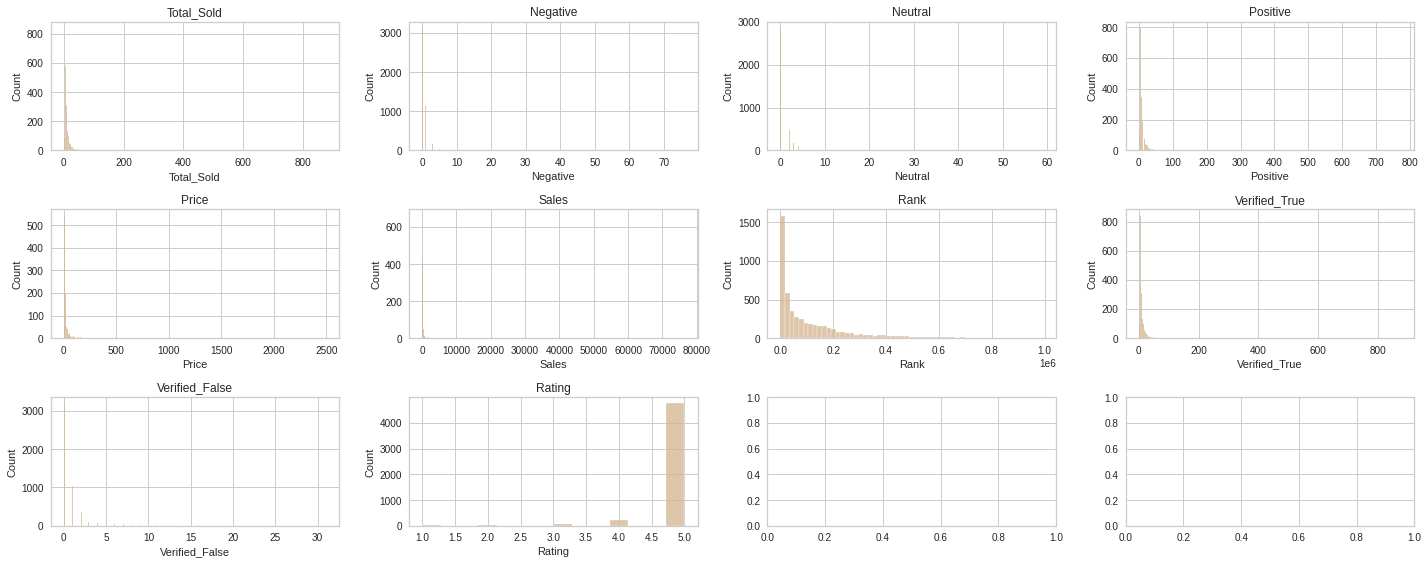

In [7]:
numerics=['int16','int32','int64','float16','float32','float64'] #list of all numeric type in daataframe
con_df=cl.select_dtypes(include=numerics)# create dataframe for all numeric type
#con_df.drop('asin',axis=1,inplace=True)
con_cols=con_df.columns # taking colums 
num_cols=4  # how many column we want in subplot 
n_bins=20 # bin size for histogram 
num_rows=int(len(con_cols)/num_cols)+1   #rows for subplot

figs,axes =plt.subplots(num_rows,num_cols,tight_layout=True,figsize=(20,8))

for col ,ax in zip(con_cols,axes.flatten()):
    sns.histplot(x=con_df[col],ax=ax,color='tan')
    ax.set_title(col)
plt.show()

In [8]:
mode = lambda x: st.mode(x)
c2=data_df.groupby(['reviewerID']).agg(
Total_Purchase=(1,'count'),
Negative=('Negative','count'),
Neutral=('Neutral','count'),
Positive=('Positive','count'),
Price=('price','mean'),
Sales=('price','sum'),
Rank=('rank','median'),
Verified_True=(1,'count'),
Verified_False=(0,'count'),
Rating=('overall','mean')
).reset_index()
display(c2.sort_values(by='Total_Purchase', ascending=True).head())

,reviewerID,Total_Purchase,Negative,Neutral,Positive,Price,Sales,Rank,Verified_True,Verified_False,Rating
7113,A3F9CMU8KNAY1M,0,0,1,6,27.208571,190.46,52196.0,0,7,4.428571
9876,ALQ4USPEQ9L5N,0,0,0,6,9.895000,59.37,263289.5,0,6,4.166667
9873,ALNFHVS3SC4FV,0,0,1,6,51.624286,361.37,183160.0,0,7,4.428571
5595,A2WRAS11XMPS96,0,0,0,5,6.764000,33.82,19506.0,0,5,5.000000
8173,A3SFSFJZFI0OQN,0,0,1,0,10.980000,10.98,1121.0,0,1,3.000000


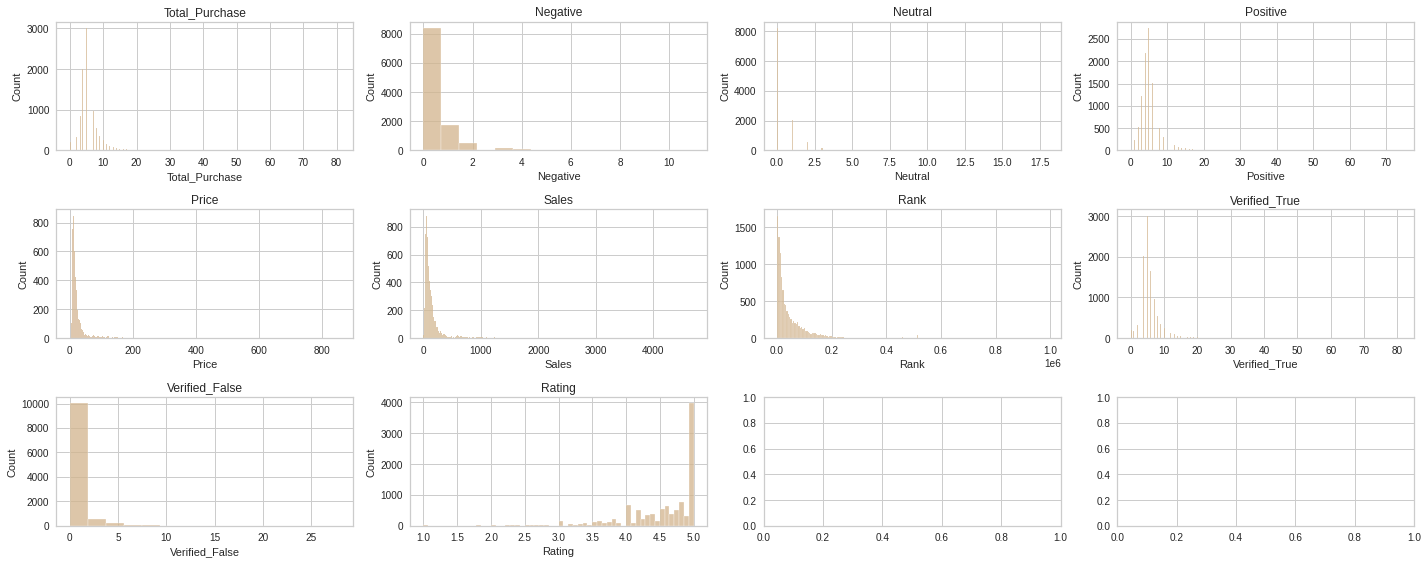

In [9]:
numerics=['int16','int32','int64','float16','float32','float64'] #list of all numeric type in daataframe
con_df=c2.select_dtypes(include=numerics)# create dataframe for all numeric type
#con_df.drop('asin',axis=1,inplace=True)
con_cols=con_df.columns # taking colums 
num_cols=4  # how many column we want in subplot 
n_bins=20 # bin size for histogram 
num_rows=int(len(con_cols)/num_cols)+1   #rows for subplot

figs,axes =plt.subplots(num_rows,num_cols,tight_layout=True,figsize=(20,8))

for col ,ax in zip(con_cols,axes.flatten()):
    sns.histplot(x=con_df[col],ax=ax,color='tan')
    ax.set_title(col)
plt.show()

## **Customers Clusters**

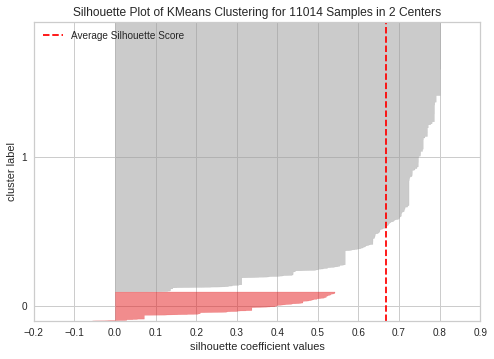

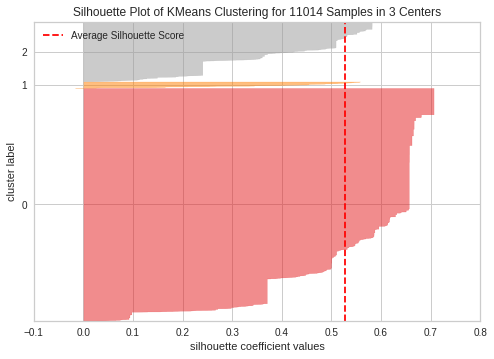

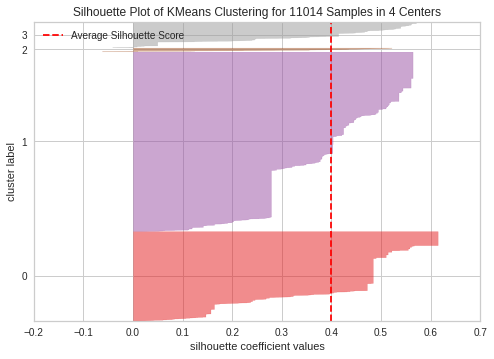

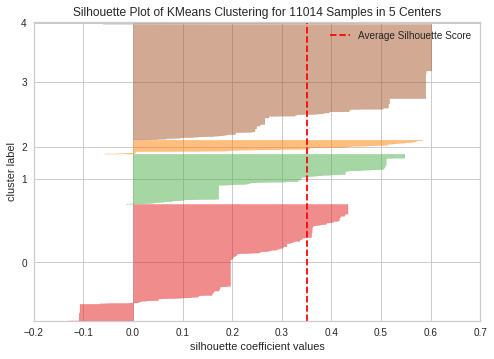

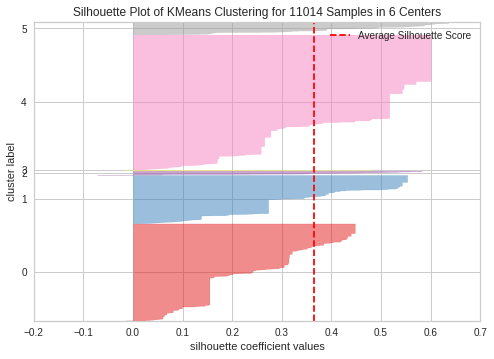

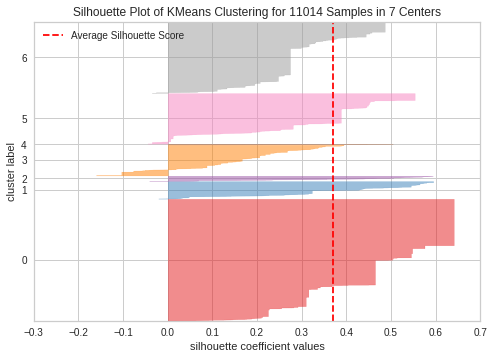

In [10]:
cs = c2.iloc[:,[1,2,3,4]]

for i in range(2,8):
    silhouette_visualizer(KMeans(i, random_state=12), cs)

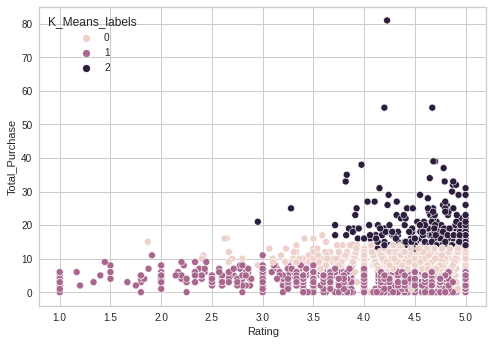

In [11]:
model = KMeans(n_clusters=3)
model.fit(cs)

labels= model.labels_
c2['K_Means_labels'] = labels
sns.scatterplot(data= c2 , y='Total_Purchase',x='Rating', hue = 'K_Means_labels');

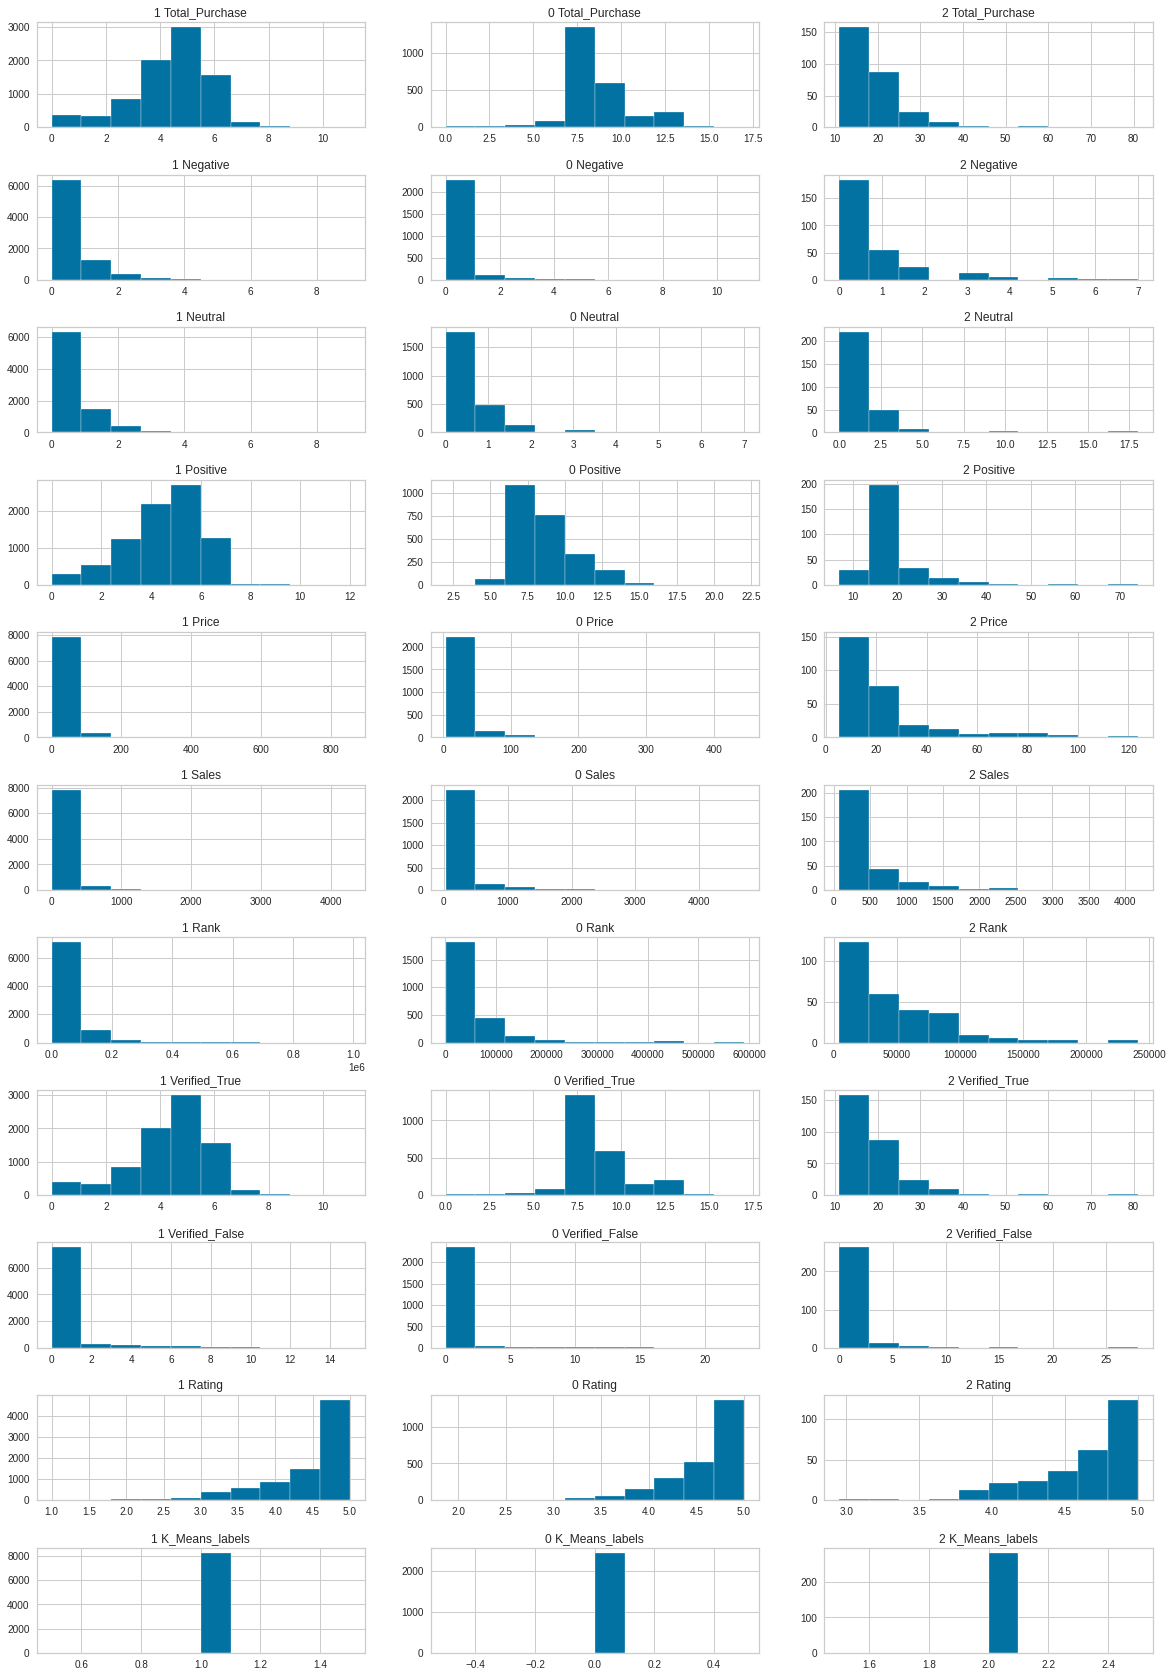

In [19]:
c3=c2.iloc[:,1:]
fig,ax=plt.subplots(11,len(c3['K_Means_labels'].unique()),figsize=(20,30))
for i in range(11):
    for j in range(len(c3['K_Means_labels'].unique())):
        ax[i,j].hist(c3[c3['K_Means_labels']==c3['K_Means_labels'].unique()[j]].iloc[:,i])
        ax[i,j].set_title(str(c3['K_Means_labels'].unique()[j])+' '+str(c3.columns[i]))
plt.subplots_adjust(hspace=0.45,wspace=0.2)

In [18]:
c2

,reviewerID,Total_Purchase,Negative,Neutral,Positive,Price,Sales,Rank,Verified_True,Verified_False,Rating,K_Means_labels,H_labels
0,A0096681Y127OL1H8W3U,3,0,0,5,12.668000,63.34,485982.0,3,2,5.000000,1,1
1,A0196552RI15HI7JB9PW,5,0,0,5,8.244000,41.22,75164.0,5,0,5.000000,1,1
2,A0289048PRWFY7ZXQKCD,8,0,2,7,16.623333,149.61,24413.0,8,1,3.777778,0,2
3,A0455940O5EUXQDU46QL,7,0,1,6,39.420000,275.94,3438.0,7,0,4.428571,0,1
4,A07936821FOVJO6NP4Q8,8,0,2,7,8.593333,77.34,39408.0,8,1,4.444444,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11009,AZXS6P5QWNMLC,4,0,2,2,11.492500,45.97,156388.0,4,0,3.750000,1,1
11010,AZY0M1ANDSEPL,4,0,0,4,19.990000,79.96,3029.0,4,0,5.000000,1,1
11011,AZYIBG912W011,5,0,0,5,5.862000,29.31,5372.0,5,0,5.000000,1,1
11012,AZYPAWSYSCISH,11,1,0,10,20.965455,230.62,9936.0,11,0,4.636364,0,0


**Loyal Customers**: 1st Cluster is for loyal customers where customers is more frequent purchasing higher number of pruducts and leaving a positive Review.


---


**Opportunistic Buyers:** 2nd Cluster is for Oppotunistic buyer An opportunistic buyer is likely to pay a much higher multiple when introduced to a company with overly attractive attributes, ones that are coveted by the buyer. 

---

**Infrequent Buyers**: Cluster Zero is for Infrequent Buyers These customers are not frequent and purchase very less number of product there ratings can anywhere from one to five. 

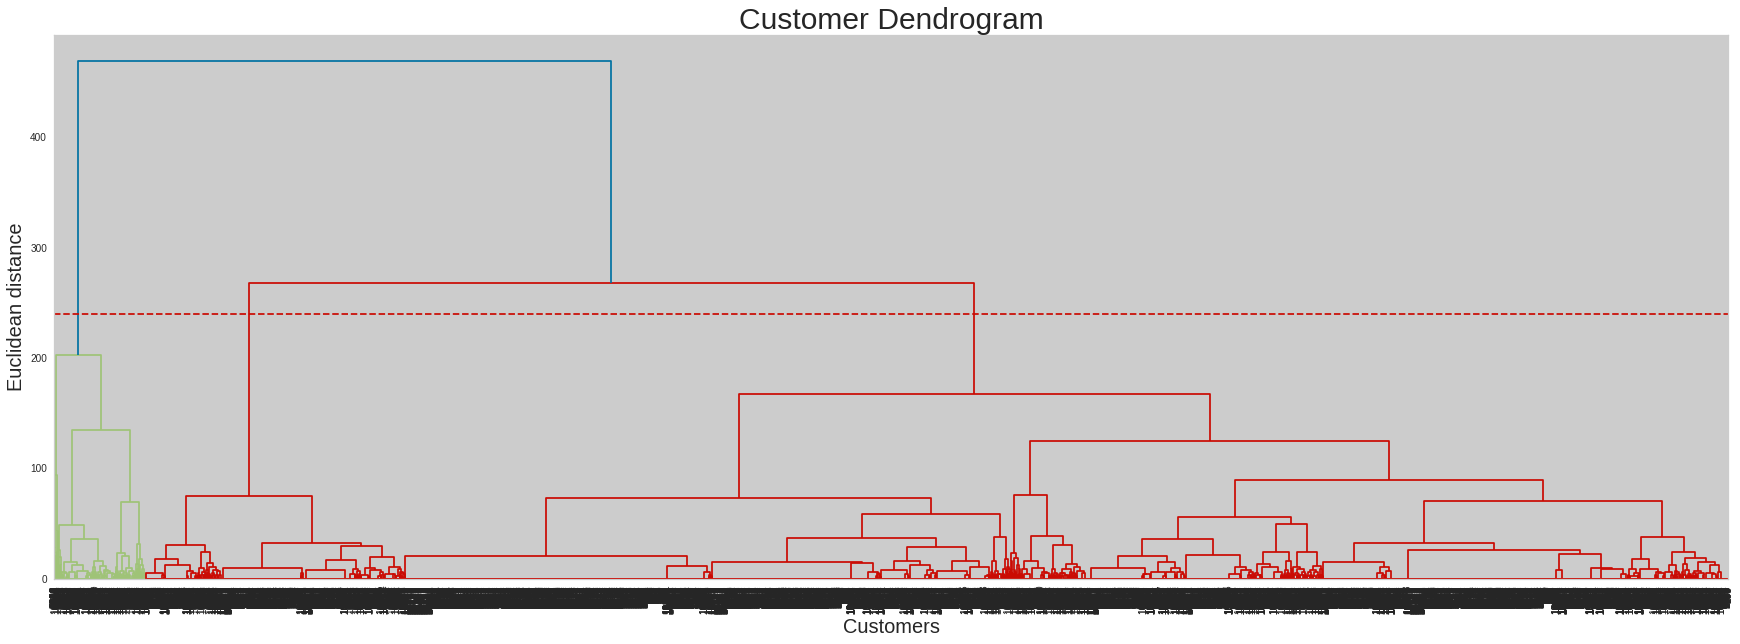

In [12]:
sys.setrecursionlimit(100000)

plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(cs, method = 'ward'))
plt.axhline(y=240, color='r', linestyle='--')
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Customer Dendrogram',fontsize=30)
plt.xlabel('Customers',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

In [13]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(cs)
c2['H_labels'] = y_hc

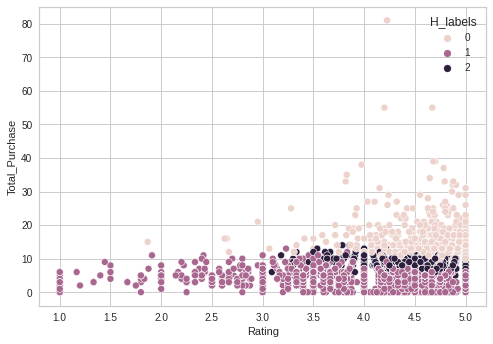

In [14]:
sns.scatterplot(data= c2 , y='Total_Purchase',x='Rating', hue = 'H_labels');

## **Product Clusters**


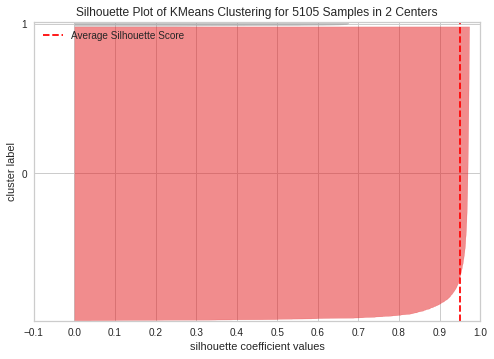

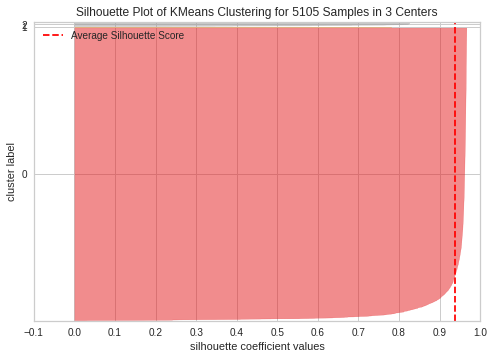

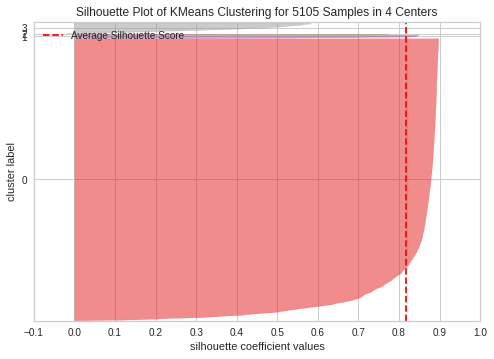

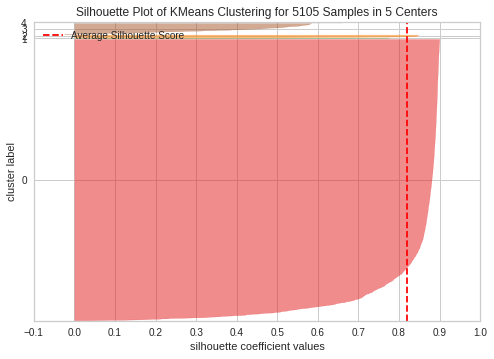

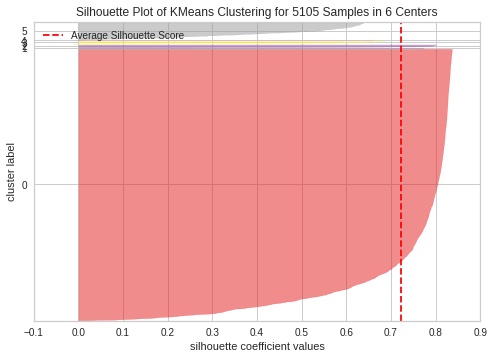

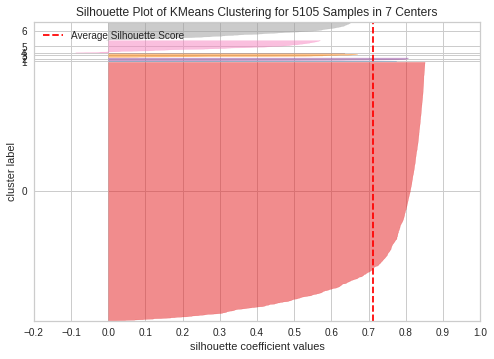

In [15]:
csp = cl.iloc[:,[1,5]]

for i in range(2,8):
    silhouette_visualizer(KMeans(i, random_state=12), csp)

In [16]:
cl

,asin,Total_Sold,Negative,Neutral,Positive,Price,Sales,Rank,Verified_True,Verified_False,Rating
0,B0000223SI,12,0,0,13,15.99,207.87,19857.0,12,1,5
1,B0000223SK,20,0,1,21,17.99,395.78,13586.0,20,2,5
2,B0000223UV,26,1,2,32,10.24,358.40,340.0,26,9,5
3,B00002246J,15,0,1,15,4.34,69.44,330278.0,15,1,5
4,B0000224J0,12,0,0,15,6.98,104.70,51285.0,12,3,5
...,...,...,...,...,...,...,...,...,...,...,...
5100,B01HCFJC0Y,15,0,0,15,9.21,138.15,12111.0,15,0,5
5101,B01HCQSHNG,7,1,3,3,25.89,181.23,333.0,7,0,3
5102,B01HDXZR5E,17,1,0,16,6.59,112.03,707.0,17,0,5
5103,B01HDYEAOW,5,0,0,5,9.11,45.55,49206.0,5,0,5


In [17]:
model = KMeans(n_clusters=4)
model.fit(csp)

labels= model.labels_
cl['K_Means_labels'] = labels

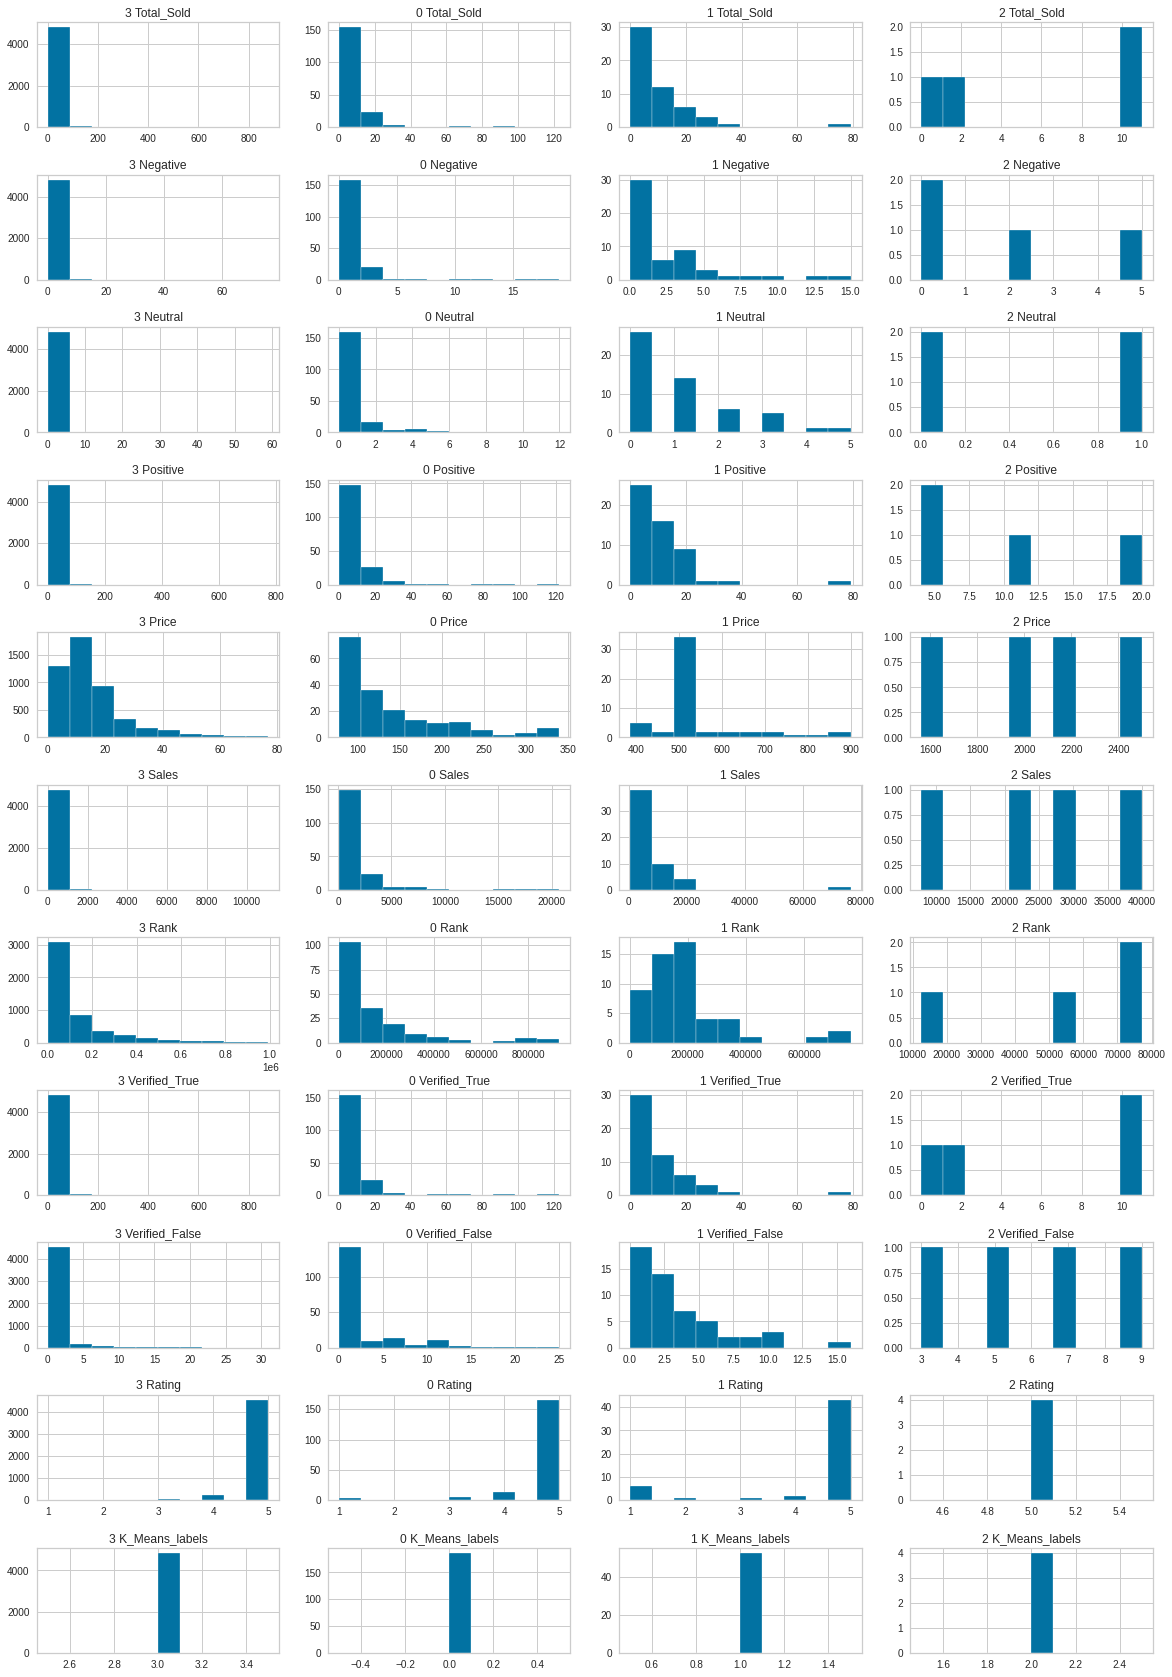

In [23]:
c3=cl.iloc[:,1:]
fig,ax=plt.subplots(11,len(c3['K_Means_labels'].unique()),figsize=(20,30))
for i in range(11):
    for j in range(len(c3['K_Means_labels'].unique())):
        ax[i,j].hist(c3[c3['K_Means_labels']==c3['K_Means_labels'].unique()[j]].iloc[:,i])
        ax[i,j].set_title(str(c3['K_Means_labels'].unique()[j])+' '+str(c3.columns[i]))
plt.subplots_adjust(hspace=0.45,wspace=0.2)

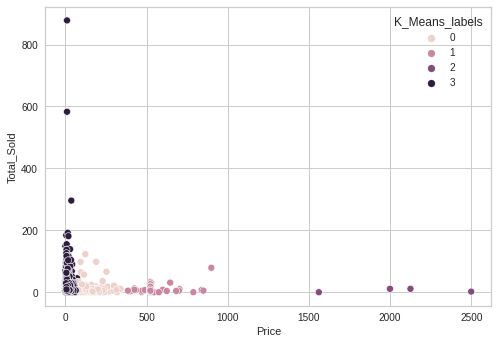

In [20]:
sns.scatterplot(data= cl , x='Price',y='Total_Sold', hue = 'K_Means_labels');

**Cluster 0** = Average Price Average Volume

---

**Cluster 1** = High Price Low Volume 

---

**Cluster 2** = Astronomical Price Very low Volume 

---

**Cluster 3** = Low Price High Volume

# **Time Series**
---




In [ ]:
data_d=pd.read_csv('Clean_data.csv')
data_d.drop(columns=['Unnamed: 0','index'],inplace=True)
data_d['unixReviewTime']=pd.to_datetime(data_d['unixReviewTime'])
t_data = data_d.set_index('unixReviewTime')
t_data.sort_index(inplace=True)
t_data.head()
pst = t_data[t_data['overall']>3]
ngt = t_data[t_data['overall']<3]
nut = t_data[t_data['overall']==3]

In [ ]:
data_d.head(1)

In [ ]:
pst.head(1)

# **Data Decomposition**

In [ ]:
pst.sort_index(inplace=True)

df_daily = pst['reviewerID'].resample('d').count()

decomposition = seasonal_decompose(df_daily, model='additive',period=365)

dt=decomposition.trend
ds=decomposition.seasonal
dr=decomposition.resid

a= [df_daily,dt,ds,dr]

# Trend
fig , axes =plt.subplots(4,1, figsize=(15,15))
for i ,ax in zip(a,axes.flatten()):
    ax.plot(i)
    ax.set_ylabel(i.name)
    ax.set_title(i.name)

In [ ]:
def interact_time_series(Catergory='Select All', Type='Select All'):

  if Catergory=='Select All':
    data = t_data
  else:
    if Type == 'Neutral':
      data = nut[nut['main_cat']==Catergory]
    elif Type == 'Negative':
      data = ngt[ngt['main_cat']==Catergory]
    elif Type == 'Positve':
      data = pst[pst['main_cat']==Catergory]
    else:
      data = t_data

  df_monthly = data['review'].resample('M').count()
  df_monthly.head()

  df_monthly = df_monthly.ffill()


  decomposition = seasonal_decompose(df_monthly, model='additive',period=12)

  dt=decomposition.trend
  ds=decomposition.seasonal
  dr=decomposition.resid

  a= [df_monthly,dt,ds,dr]

  # Trend
  fig , axes =plt.subplots(4,1, figsize=(15,15))
  for i ,ax in zip(a,axes.flatten()):
      ax.plot(i)
      ax.set_ylabel(i.name)
      ax.set_title(i.name)

interact(interact_time_series,Catergory=np.append(data_d.main_cat.unique(),'Select All'), Type = ['Positive','Negative','Neutral','Select All']) ;

In [ ]:
def interact_time_series(Catergory='Select All', Type='Select All'):

  if Catergory=='Select All':
    data = t_data
  else:
    if Type == 'Neutral':
      data = nut[nut['main_cat']==Catergory]
    elif Type == 'Negative':
      data = ngt[ngt['main_cat']==Catergory]
    elif Type == 'Positve':
      data = pst[pst['main_cat']==Catergory]
    else:
      data = t_data

  global df_monthly
  df_monthly = data['review'].resample('M').count()
  df_monthly = df_monthly.ffill()
  pvalue = adfuller(df_monthly)[1]
  print('\n\n')

  if pvalue < 0.05:
      msg = "pvalue={}. Data is Stationary. Proceed to model building".format(pvalue)
  else:
      msg = "pvalue={}. Data is not Stationary. Make the data stationary before model building".format(pvalue)
      
  print(msg)
  # split the data into train and test
  ss = int(0.75 * len(df_monthly))
  global train_df, test_df
  train_df = df_monthly.iloc[:ss]
  test_df = df_monthly.iloc[ss:]
  print("\n\nTrain = {}, Test = {}".format(len(train_df), len(test_df)))
  print('\n\n')
 

  # ACF and PACF plots
  ROWS = 1; COLS = 2
  fig,ax = plt.subplots(ROWS,COLS,figsize=(12,6))
  plot_acf(df_monthly, lags=20, ax=ax[0]);
  plt.title("Auto Correlation")

  plot_pacf(df_monthly, lags=20, ax=ax[1]);
  plt.title("Partial Auto Correlation")

  #plt.show()



interact(interact_time_series,Catergory=np.append(data_d.main_cat.unique(),'Select All'), Type = ['Positive','Negative','Neutral','Select All']) ;

In [ ]:
p=3;d=0;q=14; season_order=18

model = SARIMAX(df_monthly, order=(p,d,q), seasonal_order=(p,d,q,season_order)).fit()

In [ ]:
model.save('EntireDataModel')

In [ ]:
m = pickle.load(open('EntireDataModel','rb'))

In [ ]:
print(m.summary(
    
))


In [ ]:
predictions = model.predict(start=139,end=185,dynamic=True)

In [ ]:
df_res = pd.DataFrame({'actual':test_df, 'predicted':predictions, 'err': (test_df-predictions)})
df_res.head()

In [ ]:
df_res.plot(figsize=(12,8));

In [ ]:
fcast = model.predict(start=len(df_monthly)-1, end=len(df_monthly)+100).rename('Forecast')
fcast = fcast.apply(lambda x: 0 if x<0  else x)
print(fcast)

In [ ]:
df_monthly.plot(figsize=(10,8),legend=True)
fcast.plot(legend=True,c='r')

In [ ]:
np.sqrt(mean_squared_error(df_res.actual,df_res.predicted))

In [ ]:
import statsmodels.api as sm
# LJung-Box test
pvalue = sm.stats.acorr_ljungbox(model.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")


# **Predition for Positive Reviews of Industrial & Scientific Category**

In [ ]:
data = pst[pst['main_cat']=='Industrial & Scientific']

df_monthly = data['review'].resample('M').count()
df_monthly = df_monthly.ffill()
pvalue = adfuller(df_monthly)[1]
print('\n\n')

if pvalue < 0.05:
    msg = "pvalue={}. Data is Stationary. Proceed to model building".format(pvalue)
else:
    msg = "pvalue={}. Data is not Stationary. Make the data stationary before model building".format(pvalue)
    
print(msg)
# split the data into train and test
data = pst[pst['main_cat']=='Industrial & Scientific']

df_monthly = data['review'].resample('M').count()
df_monthly = df_monthly.ffill()
ss = int(0.75 * len(df_monthly))

train_df = df_monthly.iloc[:ss]
test_df = df_monthly.iloc[ss:]
print("\n\nTrain = {}, Test = {}".format(len(train_df), len(test_df)))
print('\n\n')


ROWS = 1; COLS = 2
fig,ax = plt.subplots(ROWS,COLS,figsize=(12,6))
plot_acf(df_monthly, lags=20, ax=ax[0]);
plt.title("Auto Correlation")

plot_pacf(df_monthly, lags=20, ax=ax[1]);
plt.title("Partial Auto Correlation")
plt.show()


#p=int(input('Enter the Value of P :-' ));d=int(input('Enter the Value of D :-' ));q=int(input('Enter the Value of Q :-' )); 
season_order=18
p=3
q=12
d=0



model = SARIMAX(df_monthly, order=(p,d,q), seasonal_order=(p,d,q,season_order)).fit()
model.save('Positive_Reviews_Model')

print(model.summary())


predictions = model.predict(start=len(train_df),end=len(train_df)+len(test_df)-1,dynamic=True)


df_res = pd.DataFrame({'actual':test_df, 'predicted':predictions, 'err': (test_df-predictions)})
df_res.head()


df_res.plot(figsize=(12,8));
plt.show()


fcast = model.predict(start=len(df_monthly), end=len(df_monthly)+30).rename('Forecast')
fcast = fcast.apply(lambda x: 0 if x<0  else x)
print(fcast)

df_monthly.plot(figsize=(10,8),legend=True)
fcast.plot(legend=True)
plt.show()

np.sqrt(mean_squared_error(df_res.actual,df_res.predicted))


import statsmodels.api as sm
# LJung-Box test
pvalue = sm.stats.acorr_ljungbox(model.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
  print("Reject H0. Bad model")
else:
  print("Fail-to-Reject H0. Good model")
# interact(interact_time_series,Catergory=np.append(data_d.main_cat.unique(),'Select All'), Type = ['Positive','Negative','Neutral','Select All']);

# **Predition for Negative Reviews of Industrial & Scientific Category**

In [ ]:
data = ngt[ngt['main_cat']=='Industrial & Scientific']

df_monthly = data['review'].resample('M').count()
df_monthly = df_monthly.ffill()
pvalue = adfuller(df_monthly)[1]
print('\n\n')

if pvalue < 0.05:
    msg = "pvalue={}. Data is Stationary. Proceed to model building".format(pvalue)
else:
    msg = "pvalue={}. Data is not Stationary. Make the data stationary before model building".format(pvalue)
    
print(msg)
# split the data into train and test
ss = int(0.75 * len(df_monthly))

train_df = df_monthly.iloc[:ss]
test_df = df_monthly.iloc[ss:]
print("\n\nTrain = {}, Test = {}".format(len(train_df), len(test_df)))
print('\n\n')


ROWS = 1; COLS = 2
fig,ax = plt.subplots(ROWS,COLS,figsize=(12,6))
plot_acf(df_monthly, lags=20, ax=ax[0]);
plt.title("Auto Correlation")
plot_pacf(df_monthly, lags=20, ax=ax[1]);
plt.title("Partial Auto Correlation")
plt.show()

#p=int(input('Enter the Value of P :-' ));d=int(input('Enter the Value of D :-' ));q=int(input('Enter the Value of Q :-' )); 
season_order=18
p = 3
d = 1
q= 10


n_model = SARIMAX(df_monthly, order=(p,d,q), seasonal_order=(p,d,q,season_order)).fit()
n_model.save('Negative_Reviews_Model_1')

print(n_model.summary())


predictions = n_model.predict(start=len(train_df),end=len(train_df)+len(test_df)-1,dynamic=True)


df_res = pd.DataFrame({'actual':test_df, 'predicted':predictions, 'err': (test_df-predictions)})
print(df_res.head())


df_res.plot(figsize=(12,8));
plt.show()


fcast = n_model.predict(start=len(df_monthly), end=len(df_monthly)+10).rename('Forecast')
fcast = fcast.apply(lambda x: 0 if x<0  else x)
print(fcast)


df_monthly.plot(figsize=(10,8),legend=True)
fcast.plot(legend=True)
plt.show()

np.sqrt(mean_squared_error(df_res.actual,df_res.predicted))


import statsmodels.api as sm
# LJung-Box test
pvalue = sm.stats.acorr_ljungbox(n_model.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
  print("Reject H0. Bad model")
else:
  print("Fail-to-Reject H0. Good model")
# interact(interact_time_series,Catergory=np.append(data_d.main_cat.unique(),'Select All'), Type = ['Positive','Negative','Neutral','Select All']);

# **Predition for Neutral Reviews of Industrial & Scientific Category**

In [ ]:
data = nut[nut['main_cat']=='Industrial & Scientific']

df_monthly = data['review'].resample('M').count()
df_monthly = df_monthly.ffill()
pvalue = adfuller(df_monthly)[1]
print('\n\n')

if pvalue < 0.05:
    msg = "pvalue={}. Data is Stationary. Proceed to model building".format(pvalue)
else:
    msg = "pvalue={}. Data is not Stationary. Make the data stationary before model building".format(pvalue)
    
print(msg)
# split the data into train and test
ss = int(0.75 * len(df_monthly))

train_df = df_monthly.iloc[:ss]
test_df = df_monthly.iloc[ss:]
print("\n\nTrain = {}, Test = {}".format(len(train_df), len(test_df)))
print('\n\n')



ROWS = 1; COLS = 2
fig,ax = plt.subplots(ROWS,COLS,figsize=(12,6))
plot_acf(df_monthly, lags=20, ax=ax[0]);
plt.title("Auto Correlation")

plot_pacf(df_monthly, lags=20, ax=ax[1]);
plt.title("Partial Auto Correlation")
plt.show()


#p=int(input('Enter the Value of P :-' ));d=int(input('Enter the Value of D :-' ));q=int(input('Enter the Value of Q :-' )); season_order=18
p=4 
q=11
d=1


nu_model = SARIMAX(df_monthly, order=(p,d,q), seasonal_order=(p,d,q,season_order)).fit()
nu_model.save('Neutral_Reviews_Model_1')

print(nu_model.summary())


predictions = nu_model.predict(start=len(train_df),end=len(train_df)+len(test_df)-1,dynamic=True)


df_res = pd.DataFrame({'actual':test_df, 'predicted':predictions, 'err': (test_df-predictions)})
print(df_res.head())


df_res.plot(figsize=(12,8));
plt.show()


fcast = nu_model.predict(start=len(df_monthly), end=len(df_monthly)+30).rename('Forecast')
fcast = fcast.apply(lambda x: 0 if x<0  else x)
print(fcast)


df_monthly.plot(figsize=(10,8),legend=True)
fcast.plot(legend=True)
plt.show()

np.sqrt(mean_squared_error(df_res.actual,df_res.predicted))


import statsmodels.api as sm
# LJung-Box test
pvalue = sm.stats.acorr_ljungbox(nu_model.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
  print("Reject H0. Bad model")
else:
  print("Fail-to-Reject H0. Good model")
# interact(interact_time_series,Catergory=np.append(data_d.main_cat.unique(),'Select All'), Type = ['Positive','Negative','Neutral','Select All']);

#**Time Series Prediction Interactive Model**

### **Can Predict Any Category Any Kind of Reviews Based on your Selection**

In [ ]:
def interact_time_series(Type='Negative'):


  if Type == 'Neutral':
    model = pickle.load(open('Neutral_Reviews_Model_1','rb'))
    data = nut[nut['main_cat']=='Industrial & Scientific']
    df_monthly = data['review'].resample('M').count()
    df_monthly = df_monthly.ffill()
    ss = int(0.75 * len(df_monthly))

    train_df = df_monthly.iloc[:ss]
    test_df = df_monthly.iloc[ss:]

  elif Type == 'Negative': 
    model = pickle.load(open('Negative_Reviews_Model_1','rb'))
    data = ngt[ngt['main_cat']=='Industrial & Scientific']
    df_monthly = data['review'].resample('M').count()
    df_monthly = df_monthly.ffill()
    ss = int(0.75 * len(df_monthly))

    train_df = df_monthly.iloc[:ss]
    test_df = df_monthly.iloc[ss:]
    
  elif Type == 'Positve':
    model = pickle.load(open('Positive_Reviews_Model','rb'))
    data = pst[pst['main_cat']=='Industrial & Scientific']
    df_monthly = data['review'].resample('M').count()
    df_monthly = df_monthly.ffill()
    ss = int(0.75 * len(df_monthly))

    train_df = df_monthly.iloc[:ss]
    test_df = df_monthly.iloc[ss:]

  else:
    data = t_data
    df_monthly = data['review'].resample('M').count()
    df_monthly = df_monthly.ffill()
    ss = int(0.75 * len(df_monthly))

    train_df = df_monthly.iloc[:ss]
    test_df = df_monthly.iloc[ss:]

    model = pickle.load(open('EntireDataModel','rb'))
  


  predictions = model.predict(start=len(train_df),end=len(train_df)+len(test_df)-1,dynamic=True)


  df_res = pd.DataFrame({'actual':test_df, 'predicted':predictions, 'err': (test_df-predictions)})
  print(df_res.head())


  df_res.plot(figsize=(12,8));
  plt.show()

  fcast = model.predict(start=len(df_monthly), end=len(df_monthly)+10).rename('Forecast')
  fcast = fcast.apply(lambda x: 0 if x<0  else x)
  print(fcast)

  df_monthly.plot(figsize=(10,8),legend=True)
  fcast.plot(legend=True)
  plt.show()

  np.sqrt(mean_squared_error(df_res.actual,df_res.predicted))

  import statsmodels.api as sm
  # LJung-Box test
  pvalue = sm.stats.acorr_ljungbox(model.resid,lags=[1],return_df=True)['lb_pvalue'].values
  if pvalue < 0.05:
    print("Reject H0. Bad model")
  else:
    print("Fail-to-Reject H0. Good model")
interact(interact_time_series, Type = ['Positive','Negative','Neutral','Select All']);

In [ ]:
def interact_time_series(Catergory='Industrial & Scientific', Type='Positve'):

  if Catergory=='Select All':
    data = t_data
  else:
    if Type == 'Neutral':
      data = nut[nut['main_cat']==Catergory]
    elif Type == 'Negative':
      data = ngt[ngt['main_cat']==Catergory]
    elif Type == 'Positve':
      data = pst[pst['main_cat']==Catergory]
    else:
      data = t_data

  global df_monthly
  df_monthly = data['review'].resample('M').count()
  df_monthly = df_monthly.ffill()
  pvalue = adfuller(df_monthly)[1]
  print('\n\n')

  if pvalue < 0.05:
      msg = "pvalue={}. Data is Stationary. Proceed to model building".format(pvalue)
  else:
      msg = "pvalue={}. Data is not Stationary. Make the data stationary before model building".format(pvalue)
      
  print(msg)
  # split the data into train and test
  ss = int(0.75 * len(df_monthly))
  global train_df, test_df
  train_df = df_monthly.iloc[:ss]
  test_df = df_monthly.iloc[ss:]
  print("\n\nTrain = {}, Test = {}".format(len(train_df), len(test_df)))
  print('\n\n')

  ROWS = 1; COLS = 2
  fig,ax = plt.subplots(ROWS,COLS,figsize=(12,6))
  plot_acf(df_monthly, lags=20, ax=ax[0]);
  plt.title("Auto Correlation")

  plot_pacf(df_monthly, lags=20, ax=ax[1]);
  plt.title("Partial Auto Correlation")

  p=int(input('Enter the Value of P :-' ));d=int(input('Enter the Value of D :-' ));q=int(input('Enter the Value of Q :-' )); season_order=18

  model = SARIMAX(df_monthly, order=(p,d,q), seasonal_order=(p,d,q,season_order)).fit()
  # Model_Name = str(input('Enter The Model Name'))
  # model.save( Model_Name)

  print(model.summary())

  predictions = model.predict(start=len(train_df),end=len(train_df)+len(test_df)-1,dynamic=True)

  df_res = pd.DataFrame({'actual':test_df, 'predicted':predictions, 'err': (test_df-predictions)})
  df_res.head()

  df_res.plot(figsize=(12,8));

  fcast = model.predict(start=len(df_monthly), end=len(df_monthly)+30).rename('Forecast')
  fcast = fcast.apply(lambda x: 0 if x<0  else x)
  print(fcast)

  df_monthly.plot(figsize=(10,8),legend=True)
  fcast.plot(legend=True)

  np.sqrt(mean_squared_error(df_res.actual,df_res.predicted))

  import statsmodels.api as sm
  # LJung-Box test
  pvalue = sm.stats.acorr_ljungbox(model.resid,lags=[1],return_df=True)['lb_pvalue'].values
  if pvalue < 0.05:
    print("Reject H0. Bad model")
  else:
    print("Fail-to-Reject H0. Good model")
interact(interact_time_series,Catergory=np.append(data_d.main_cat.unique(),'Select All'), Type = ['Positive','Negative','Neutral','Select All']);